In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
'''
def crossCheck(cross,foldnum):
    scores=[]
    for i in range(len(cross)):

        ctrain=[]
        ctrain_y=[]
        testnum=foldnum-i-1
        testme=[]
        testme_y=[]
        
        testme=np.array(testme)
        testme_y=np.array(testme_y)
        j=0
        while j<len(cross):

            
            if j!=testnum:
                for thing in cross[j]:
                    ctrain.append(thing[0])
                    ctrain_y.append(thing[1])
               
            j+=1
'''
### FORMATTING DATA ###
data=pd.read_csv('diabetic_data.csv')
diag=data[['diag_1','diag_2','diag_3']]
data=data.drop(['admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','number_inpatient','number_emergency','number_outpatient','encounter_id','patient_nbr','weight','payer_code','A1Cresult','medical_specialty','max_glu_serum','diag_1','diag_2','diag_3'],axis=1)
data=data.drop(data[data.race=='?'].index)
data=data.drop(data[data.gender=='Unknown/Invalid'].index)
read=data['readmitted']
read=read.str.upper()
read=read.replace(['NO','<30','>30'],[0,1,1])
data=data.replace(['None','Female','No','Down'],0)
data=data.replace(['Male','Yes','Up','Steady'],1)
data=data.replace(['Down'],2)
r=pd.get_dummies(data[['race','diabetesMed']])
change=pd.get_dummies(data['change'])
a=pd.get_dummies(data['age'])
newdata=pd.concat([data,r,a,change],axis=1)
newdata=newdata.drop(['age','race','readmitted','change','diabetesMed'],axis=1)
X=data.drop(['readmitted'],axis=1)
read=np.array(read)
########################

#### SPLITTING DATA ####
x, X_test, y, y_test = train_test_split(newdata, read, test_size = 0.15, random_state = 0)
X_train,x_dev,y_train,y_dev=train_test_split(x,y,test_size=.18, random_state=0)
########################

In [11]:
#### Logistic Regression ####
models = []
sol=['newton-cg', 'lbfgs', 'liblinear', 'sag']
cs=[.0001,.001,.01,.1,1,10,20,50,100,1000]
for s in sol:
    print("Testing",s)
    for c in cs:
        model = LogisticRegression(C=c,solver=s)
        model.fit(X_train,y_train)
        pred=(model.predict(x_dev))
        testy=np.array(y_dev)
    
        i=0
        falsep=0
        falsen=0
        wrongn=0
        rightp=0
        for thing in pred:
            if thing != testy[i] and thing==1:
                falsep+=1
            elif thing!=testy[i] and thing==0:
                falsen+=1
            elif thing==testy[i] and thing==1:
                rightp+=1
            else: 
                wrongn+=1


            i+=1
        p=rightp/(rightp+falsep)
        r=rightp/(falsen+rightp)
        f=2*((p*r)/(p+r))
        print("  C =",c,": Accuracy:",round(acc,5),"Precision:",round(p,5),"Recall:",round(r,5),"F1:",round(f,5))
        #print(model.feature_importances_)
        acc=accuracy_score(pred,testy)
        models.append((model,acc,f))
        
top_acc = max(models,key=itemgetter(1))[1]
top_acc_f1 = max(models,key=itemgetter(1))[2]
top_model_acc = max(models,key=itemgetter(1))[0]

print('\nBest model score by accuracy:',top_acc,"\nfrom model:  ",top_model_acc)
print('\nCorresponding f1:',top_acc_f1)



Testing newton-cg
  C= 0.0001 : Accuracy: 0.55843 Precision: 0.54594 Recall: 0.36833 F1: 0.43988
  C= 0.001 : Accuracy: 0.55567 Precision: 0.54578 Recall: 0.40341 F1: 0.46392
  C= 0.01 : Accuracy: 0.55837 Precision: 0.54649 Recall: 0.40674 F1: 0.46637
  C= 0.1 : Accuracy: 0.55909 Precision: 0.54596 Recall: 0.40854 F1: 0.46736
  C= 1 : Accuracy: 0.55889 Precision: 0.54561 Recall: 0.40813 F1: 0.46696
  C= 10 : Accuracy: 0.55863 Precision: 0.5453 Recall: 0.40813 F1: 0.46685
  C= 20 : Accuracy: 0.55843 Precision: 0.5454 Recall: 0.40813 F1: 0.46688
  C= 50 : Accuracy: 0.5585 Precision: 0.5454 Recall: 0.40813 F1: 0.46688
  C= 100 : Accuracy: 0.5585 Precision: 0.5454 Recall: 0.40813 F1: 0.46688
  C= 1000 : Accuracy: 0.5585 Precision: 0.5454 Recall: 0.40813 F1: 0.46688
Testing lbfgs
  C= 0.0001 : Accuracy: 0.5585 Precision: 0.54545 Recall: 0.3686 F1: 0.43992
  C= 0.001 : Accuracy: 0.55541 Precision: 0.548 Recall: 0.40771 F1: 0.46756
  C= 0.01 : Accuracy: 0.56014 Precision: 0.5457 Recall: 0.413

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


  C= 0.01 : Accuracy: 0.55837 Precision: 0.54728 Recall: 0.40535 F1: 0.46574
  C= 0.1 : Accuracy: 0.55948 Precision: 0.54667 Recall: 0.40854 F1: 0.46762
  C= 1 : Accuracy: 0.55935 Precision: 0.54679 Recall: 0.40924 F1: 0.46812
  C= 10 : Accuracy: 0.55948 Precision: 0.54658 Recall: 0.40924 F1: 0.46804
  C= 20 : Accuracy: 0.55935 Precision: 0.5467 Recall: 0.4091 F1: 0.46799
  C= 50 : Accuracy: 0.55942 Precision: 0.54679 Recall: 0.40924 F1: 0.46812
  C= 100 : Accuracy: 0.55948 Precision: 0.54679 Recall: 0.40924 F1: 0.46812
  C= 1000 : Accuracy: 0.55948 Precision: 0.5467 Recall: 0.4091 F1: 0.46799

Best model score by accuracy: 0.560664783551 from LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

Corresponding f1: 0.4744617318874745


n_estimators = 10
	max_depth = 5
	50 iterations
	Best model score: 0.567496551271
	max_depth = 10
	50 iterations
	Best model score: 0.574065558694
	max_depth = 15
	50 iterations
	Best model score: 0.570321224463
10 estimators 	best at max_depth = 10 
score = 0.574065558694


n_estimators = 15
	max_depth = 5
	50 iterations
	Best model score: 0.560927543848
	max_depth = 10
	50 iterations
	Best model score: 0.572423306838
	max_depth = 15
	50 iterations
	Best model score: 0.573145897655
15 estimators 	best at max_depth = 15 
score = 0.573145897655


n_estimators = 20
	max_depth = 5
	50 iterations
	Best model score: 0.561912894962
	max_depth = 10
	50 iterations
	Best model score: 0.576364711292
	max_depth = 15
	50 iterations
	Best model score: 0.572686067135
20 estimators 	best at max_depth = 10 
score = 0.576364711292



final test score: 0.562784776199


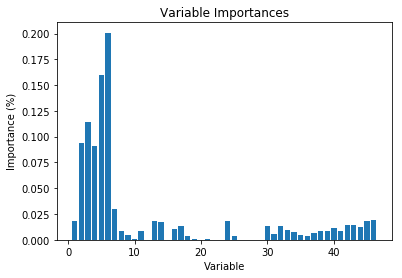

1 gender   2 time_in_hospital   3 num_lab_procedures   4 num_procedures   5 num_medications   6 number_diagnoses   7 metformin   8 repaglinide   9 nateglinide   10 chlorpropamide   11 glimepiride   12 acetohexamide   13 glipizide   14 glyburide   15 tolbutamide   16 pioglitazone   17 rosiglitazone   18 acarbose   19 miglitol   20 troglitazone   21 tolazamide   22 examide   23 citoglipton   24 insulin   25 glyburide-metformin   26 glipizide-metformin   27 glimepiride-pioglitazone   28 metformin-rosiglitazone   29 metformin-pioglitazone   30 race_AfricanAmerican   31 race_Asian   32 race_Caucasian   33 race_Hispanic   34 race_Other   35 [0-10)   36 [10-20)   37 [20-30)   38 [30-40)   39 [40-50)   40 [50-60)   41 [60-70)   42 [70-80)   43 [80-90)   44 [90-100)   45 0   46 Ch   

In [16]:
#### RANDOM FOREST ####


#hyperparameter grid search 
mxDepth = [5,10,15] #mxDepth 
n_ests = [10,15,20] #n_estimators
best_models = []
for n in n_ests:
    print("n_estimators =",n)
    maximized_models=[]
    for mD in mxDepth:
        results = []
        print("\tmax_depth =",mD)
        for _ in range(51):
            model = RandomForestClassifier(n_estimators=n,max_depth=mD)
            model.fit(X_train,y_train)
            pred = model.predict(x_dev)
            testy=np.array(y_dev)
            print('\t'+str(_)+" iterations",end="\r",flush=True)

            results.append((model,accuracy_score(pred,testy)))
        print('\n\tBest model score:',max(results,key=itemgetter(1))[1])
        maximized_models.append((max(results,key=itemgetter(1))[0],max(results,key=itemgetter(1))[1],mD))

    print(n,"estimators","\tbest at max_depth =",max(maximized_models,key=itemgetter(1))[2],"\nscore =",max(maximized_models,key=itemgetter(1))[1])
    print("\n")
    best_models.append((max(maximized_models,key=itemgetter(1))[0],max(maximized_models,key=itemgetter(1))[1],n))

#grid search derived best model
final_best = max(best_models,key=itemgetter(1))[0]

#score
pred_final = final_best.predict(X_test)
print("\nfinal test score:",accuracy_score(pred_final,np.array(y_test)))

plt.bar(range(1,len(final_best.feature_importances_)+1),final_best.feature_importances_,ls="None")
plt.xlabel("Variable")
plt.ylabel("Importance (%)")
plt.title("Variable Importances")
plt.show()
for idx, column in enumerate(newdata.columns):
    print(idx+1, column, end="   ")

In [17]:
#### Baye's ####

#bayes doesn't work for the hold out method, so we won't have a dev set
train_X, test_X, train_y, test_y = train_test_split(data, read, test_size=0.3,random_state=0)
#print(train_X)
trainX=np.array(test_X)
trainy=np.array(test_y)

#print(trainX)
answers=[]
for thing in trainX:
   # print(len(thing))
    #num lab, diabetes meds, time in hospital <4
    if thing[2]==1 and thing[3]>=4 and thing[4]>=40 and thing[31]=='Yes':
       # print(thing[31])
        answers.append(1)
    else:
        answers.append(0)
i=0
#trainX=list(trainX)
test=0
print(trainX)
for answer in answers:
    if answer==trainy[i]:
        test+=1
    i+=1
print(test/len(answers))

[['Caucasian' 0 '[40-50)' ..., 'Ch' 1 '>30']
 ['AfricanAmerican' 1 '[70-80)' ..., 'Ch' 1 'NO']
 ['Other' 1 '[60-70)' ..., 0 1 'NO']
 ..., 
 ['Caucasian' 1 '[90-100)' ..., 0 1 'NO']
 ['Caucasian' 0 '[80-90)' ..., 'Ch' 1 'NO']
 ['Hispanic' 0 '[50-60)' ..., 'Ch' 1 'NO']]
0.5408067542213884
